In [1]:
import pandas as pd

In [29]:
dirty_df = pd.read_csv("./Group113_dirty_data.csv")
outlier_df = pd.read_csv("./Group113_outlier_data.csv")
missing_df = pd.read_csv("./Group113_missing_data.csv")
node = pd.read_csv("./nodes.csv")
edges = pd.read_csv("./edges.csv")
branches = pd.read_csv("./branches.csv")

In [32]:
missing_df.shape

(500, 12)

In [33]:
missing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
order_id                   500 non-null object
date                       500 non-null object
time                       500 non-null object
order_type                 500 non-null object
branch_code                400 non-null object
order_items                500 non-null object
order_price                500 non-null float64
customer_lat               500 non-null float64
customer_lon               500 non-null float64
customerHasloyalty?        500 non-null int64
distance_to_customer_KM    450 non-null float64
delivery_fee               450 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 47.0+ KB


In [34]:
missing_df.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDB00336,2018-11-27,18:59:09,Dinner,TP,"[('Fish&Chips', 9), ('Shrimp', 2), ('Pasta', 5)]",560.5,-37.816186,145.012942,0,12.129,16.144210
1,ORDJ03182,2018-03-30,10:52:23,Breakfast,NaN,"[('Coffee', 6), ('Cereal', 1)]",66.0,-37.810246,144.961350,0,8.501,11.384186
2,ORDC01032,2018-09-18,16:37:10,Dinner,NS,"[('Salmon', 6), ('Shrimp', 4), ('Pasta', 6), (...",837.0,-37.806882,144.957889,0,8.110,13.893630
3,ORDX03103,2018-11-21,18:38:52,Dinner,BK,"[('Shrimp', 8), ('Salmon', 9), ('Fish&Chips', ...",1188.5,-37.813348,144.935750,0,10.285,17.171047
4,ORDJ00175,2018-08-08,15:16:03,Lunch,NaN,"[('Burger', 7), ('Steak', 4)]",397.0,-37.806441,144.941329,0,NaN,13.082562


In [70]:
sum(missing_df['branch_code'].isnull())

100

In [41]:
missing_df[missing_df['branch_code'] == 'NS']['order_id'].unique()

array(['ORDC01032', 'ORDC10707', 'ORDC03606', 'ORDZ09567', 'ORDC07267',
       'ORDI01942', 'ORDI00053', 'ORDZ05901', 'ORDC03882', 'ORDZ00562',
       'ORDI05839', 'ORDZ10822', 'ORDI02797', 'ORDC04573', 'ORDZ06621',
       'ORDC06097', 'ORDC06099', 'ORDC08714', 'ORDZ01979', 'ORDC10230',
       'ORDI01657', 'ORDC01763', 'ORDZ09723', 'ORDC05543', 'ORDC07841',
       'ORDC00531', 'ORDZ07628', 'ORDI04604', 'ORDZ08482', 'ORDZ09336',
       'ORDC05254', 'ORDZ05560', 'ORDI00511', 'ORDC03906', 'ORDI04459',
       'ORDI02871', 'ORDI05869', 'ORDI04239', 'ORDZ09082', 'ORDI06849',
       'ORDZ09547', 'ORDZ01156', 'ORDC10271', 'ORDZ05888', 'ORDZ05589',
       'ORDZ03820', 'ORDC06606', 'ORDZ02257', 'ORDC09784', 'ORDI01475',
       'ORDI09026', 'ORDZ01477', 'ORDI09560', 'ORDC08922', 'ORDC04543',
       'ORDZ07549', 'ORDI00624', 'ORDI08267', 'ORDC06243', 'ORDZ10832',
       'ORDZ03258', 'ORDC09002', 'ORDC06476', 'ORDC03311', 'ORDZ06697',
       'ORDI10604', 'ORDZ04149', 'ORDZ08799', 'ORDI00430', 'ORDC

In [80]:
missing_df[missing_df['order_id'].str.startswith('ORDB')]

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
0,ORDB00336,2018-11-27,18:59:09,Dinner,TP,"[('Fish&Chips', 9), ('Shrimp', 2), ('Pasta', 5)]",560.50,-37.816186,145.012942,0,12.129,16.144210
10,ORDB01865,2018-11-04,18:08:27,Dinner,TP,"[('Pasta', 2), ('Shrimp', 1)]",109.00,-37.818751,144.953040,0,8.552,14.329238
29,ORDB00245,2018-07-12,14:15:12,Lunch,TP,"[('Chicken', 5), ('Burger', 4)]",284.00,-37.816873,145.007266,0,11.442,NaN
32,ORDB03699,2018-10-10,17:17:44,Dinner,TP,"[('Fish&Chips', 5), ('Salmon', 10), ('Pasta', ...",990.50,-37.819765,144.998960,0,10.572,14.407244
48,ORDB06776,2018-10-14,17:27:53,Dinner,TP,"[('Fish&Chips', 9), ('Salmon', 9)]",684.00,-37.815466,144.991616,0,10.056,15.296395
49,ORDB07125,2018-03-15,10:21:58,Breakfast,TP,"[('Cereal', 9), ('Pancake', 10)]",431.50,-37.813085,144.967067,0,8.341,10.595469
51,ORDB02581,2018-12-07,19:19:26,Dinner,NaN,"[('Fish&Chips', 8), ('Shrimp', 10), ('Pasta', 3)]",902.50,-37.817835,144.957385,0,8.298,12.375086
70,ORDB10859,2018-09-03,16:06:45,Dinner,TP,"[('Fish&Chips', 6), ('Salmon', 7), ('Shrimp', ...",1202.00,-37.807237,144.949569,0,9.569,14.322230
84,ORDB02061,2018-08-11,15:16:03,Lunch,NaN,"[('Chicken', 3), ('Fries', 1), ('Burger', 6), ...",429.00,-37.818149,144.952363,0,NaN,15.191204
86,ORDB10971,2018-10-18,17:38:01,Dinner,NaN,"[('Pasta', 2), ('Fish&Chips', 7)]",300.00,-37.803578,144.953928,0,9.634,13.738148


In [82]:
def check_branch_code(order_id, branch_code):
    if pd.isnull(branch_code):
        if order_id.startswith('ORDA') or order_id.startswith('ORDK') or order_id.startswith('ORDX'):
            return 'BK'
        elif order_id.startswith('ORDB') or order_id.startswith('ORDJ') or order_id.startswith('ORDY'):
            return 'TP'
        elif order_id.startswith('ORDC') or order_id.startswith('ORDI') or order_id.startswith('ORDZ'):
            return 'NS'
    return branch_code

missing_df['branch_code'] = missing_df.apply(lambda row:check_branch_code(row['order_id'], row['branch_code']),axis=1)

0

In [ ]:
# node.head()

In [ ]:
# print(node['lat'].max())
# print(node['lat'].min())
# print(node['lon'].max())
# print(node['lon'].min())

In [31]:
outlier_df.shape

(500, 12)

In [4]:
outlier_df.describe()

,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee
count,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,487.88090,-37.812460,144.968418,0.04200,8.627326,13.703572
std,264.30641,0.007714,0.020821,0.20079,1.686663,2.692274
min,51.00000,-37.836908,144.894564,0.00000,3.758000,5.354800
25%,283.68750,-37.818475,144.953418,0.00000,7.684000,12.417850
50%,448.75000,-37.812848,144.965990,0.00000,8.586500,13.947467
75%,636.52500,-37.805937,144.982151,0.00000,9.619250,15.140462
max,1486.00000,-37.791484,145.018679,1.00000,19.900000,23.909199


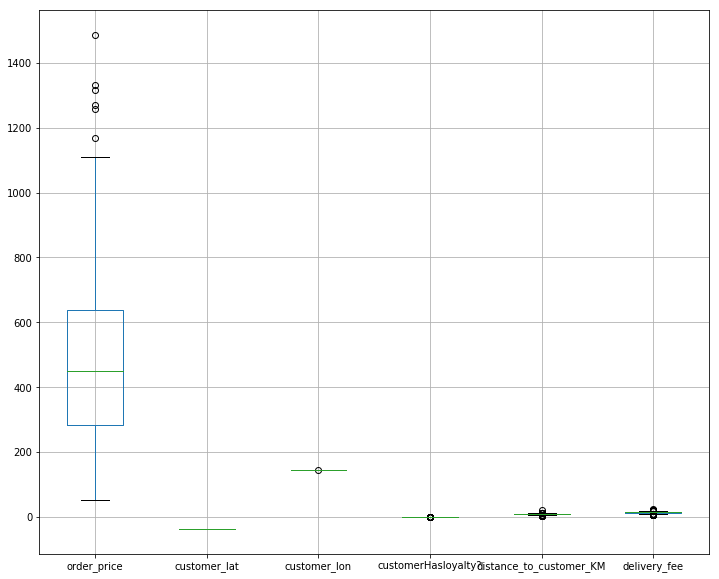

In [6]:
bp = outlier_df.boxplot(figsize=(12,10))
bp

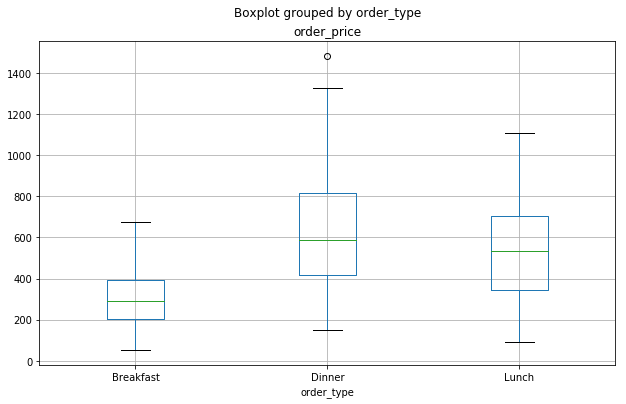

In [7]:
# 144.9631608,-37.8142177,144.9631608,-37.8142177

outlier_df.boxplot('order_price', by='order_type', figsize=(10,6))

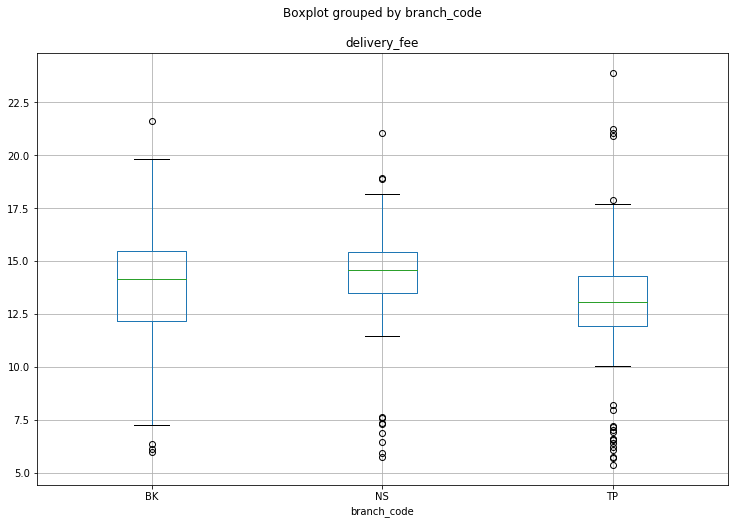

In [9]:
outlier_df.boxplot('delivery_fee', by='branch_code', figsize=(12,8))

In [10]:
outlier_df['date'] = pd.to_datetime(outlier_df['date'])
outlier_df['time'] = pd.to_datetime(outlier_df['time'])

In [11]:
def check_for_weekend(order_date):
    day = order_date.weekday()
    if day < 5:
        return 0
    else:
        return 1

outlier_df['weekend'] = outlier_df.apply(lambda row:check_for_weekend(row['date']),axis=1)

In [14]:
outlier_tp_branch = outlier_df[outlier_df['branch_code'] == 'TP']
outlier_bk_branch = outlier_df[outlier_df['branch_code'] == 'BK']
outlier_ns_branch = outlier_df[outlier_df['branch_code'] == 'NS']

Text(0, 0.5, 'Frequency')

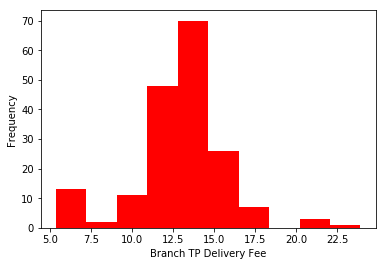

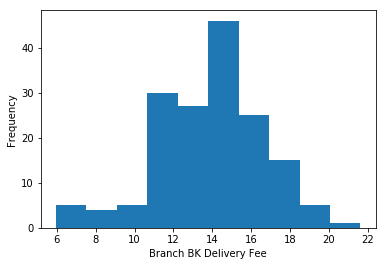

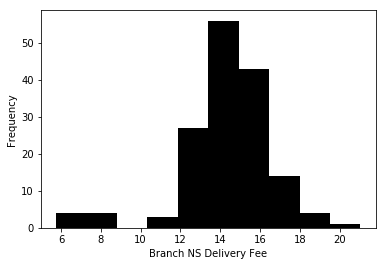

In [25]:
import matplotlib.pyplot as plt

fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
n, bins, patches = ax1.hist(outlier_tp_branch['delivery_fee'], color='r')
ax1.set_xlabel('Branch TP Delivery Fee')
ax1.set_ylabel('Frequency')


fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
n, bins, patches = ax2.hist(outlier_bk_branch['delivery_fee'])
ax2.set_xlabel('Branch BK Delivery Fee')
ax2.set_ylabel('Frequency')

fig3 = plt.figure()
ax3 = fig3.add_subplot(1, 1, 1)
n, bins, patches = ax3.hist(outlier_ns_branch['delivery_fee'], color='black')
ax3.set_xlabel('Branch NS Delivery Fee')
ax3.set_ylabel('Frequency')




In [ ]:
# outlier_tp_branch.boxplot('delivery_fee', by='order_type', figsize=(12,8))
# outlier_tp_branch.boxplot('delivery_fee', by='weekend', figsize=(12,8))
# outlier_bk_branch.boxplot('delivery_fee', by='order_type', figsize=(12,8))
# outlier_bk_branch.boxplot('delivery_fee', by='weekend', figsize=(12,8))
# outlier_ns_branch.boxplot('delivery_fee', by='order_type', figsize=(12,8))
# outlier_ns_branch.boxplot('delivery_fee', by='weekend', figsize=(12,8))

In [28]:
outlier_df.loc[outlier_df['branch_code'] == 'TP','Predicted_Delivery_Fee'] =l0.predict(outliers[outlier_df['branch_code'] == 'TP'][['distance_to_customer_KM','weekend','order_type']])

sns.residplot(outlier_df[outlier_df['branch_code']=='TP']['Predicted_Delivery_Fee'],outlier_df[outlier_df['branch_code']=='TP']['delivery_fee'],lowess=True,line_kws={'color': 'red'} )
plt.xlabel('Fitted Values')
plt.ylabel('Fare ')
plt.title('Residual VS Fitted for Fare of Uber Type 0')

NameError: name 'l0' is not defined

In [27]:
outlier_df.head()

,order_id,date,time,order_type,branch_code,order_items,order_price,customer_lat,customer_lon,customerHasloyalty?,distance_to_customer_KM,delivery_fee,weekend
0,ORDA10115,2018-03-19,2019-09-29 10:32:06,Breakfast,BK,"[('Coffee', 8), ('Eggs', 2)]",104.0,-37.807628,144.958171,0,7.886,12.219357,0
1,ORDZ00416,2018-11-23,2019-09-29 18:49:00,Dinner,NS,"[('Salmon', 3), ('Fish&Chips', 8)]",403.0,-37.818522,144.983040,0,8.862,14.817088,0
2,ORDY09520,2018-10-22,2019-09-29 17:48:10,Dinner,TP,"[('Pasta', 8), ('Salmon', 1), ('Fish&Chips', 3...",690.0,-37.809585,144.946730,0,9.675,14.076967,0
3,ORDK01884,2018-07-23,2019-09-29 14:45:38,Lunch,BK,"[('Steak', 2), ('Salad', 2), ('Chicken', 8), (...",404.4,-37.811825,144.990334,0,5.173,10.891835,0
4,ORDX03954,2018-12-28,2019-09-29 20:00:00,Dinner,BK,"[('Shrimp', 1), ('Fish&Chips', 4), ('Pasta', 1...",303.5,-37.797493,145.008720,0,5.321,11.923254,0


In [ ]:
outlier_df.boxplot('distance_to_customer_KM', figsize=(12,8))

In [ ]:
outlier_df.boxplot('distance_to_customer_KM', by='branch_code', figsize=(12,8))